In [1]:
import sys  
sys.path.insert(0, '../airflow/plugins/utils')

In [2]:
import pandas as pd
import numpy as np
import db
import matplotlib.pyplot as plt

In [3]:
def _get_db_url(connector: str) -> str:
    return f'user=trader password=income host=localhost port=5432 dbname=stocks'

In [4]:
db._get_db_url = _get_db_url

In [5]:
data = db.get_data_from_table('posdf', 'aapl')

In [37]:
SMA = 30

In [38]:
obv = []
obv.append(0)

for i in range(1, len(data)):
    if data['close'][i] > data['close'][i-1]:
        obv.append(obv[-1] + data['volume'][i])
    elif data['close'][i] < data['close'][i-1]:
        obv.append(obv[-1] - data['volume'][i])
    else:
        obv.append(obv[-1])

In [39]:
data['obv'] = obv
data['obv_sma'] = data['obv'].rolling(SMA).mean()

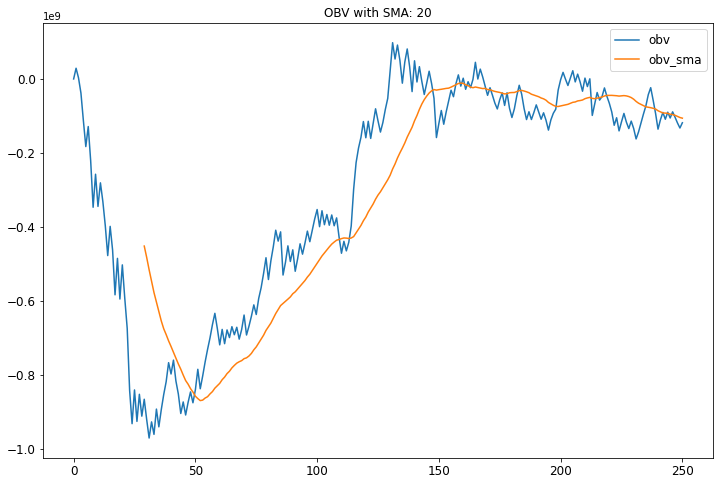

In [40]:
data[['obv', 'obv_sma']] \
    .plot(figsize=(12, 8), title=f'OBV with SMA: {COM}', fontsize=12)
plt.legend(fontsize=12);

In [41]:
data['position'] = np.where(data['obv'] > data['obv_sma'], 1, -1)

In [42]:
data['position'].value_counts()

 1    132
-1    119
Name: position, dtype: int64

In [43]:
data.tail(10)

,time,open,high,low,close,volume,obv,obv_ema,position,obv_sma
241,2021-02-01 07:00:00,133.12,135.38,130.96,134.14,25563867,-110225396,-8.199311e+07,-1,-8.897868e+07
242,2021-02-02 07:00:00,134.76,136.45,134.50,134.99,19587632,-90637764,-8.240477e+07,1,-9.201064e+07
243,2021-02-03 07:00:00,135.70,136.00,133.62,133.94,18380120,-109017884,-8.367207e+07,-1,-9.235705e+07
244,2021-02-04 07:00:00,136.02,137.46,134.63,137.39,19081589,-89936295,-8.397036e+07,1,-9.308145e+07
245,2021-02-05 07:00:00,137.32,138.40,135.87,136.76,15678428,-105614723,-8.500105e+07,-1,-9.537883e+07
246,2021-02-08 07:00:00,137.18,137.91,135.00,136.91,16655834,-88958889,-8.518952e+07,1,-9.643730e+07
247,2021-02-09 07:00:00,136.01,137.87,135.80,136.01,14578810,-103537699,-8.606325e+07,-1,-9.829740e+07
248,2021-02-10 07:00:00,136.51,137.34,134.41,135.39,15590571,-119128270,-8.763778e+07,-1,-1.014592e+08
249,2021-02-11 07:00:00,135.39,136.36,133.79,135.13,13551807,-132680077,-8.978267e+07,-1,-1.043215e+08
250,2021-02-12 07:00:00,134.80,135.50,133.71,135.37,14199593,-118480484,-9.114924e+07,-1,-1.060809e+08
